## Scikit Learn code using Linear Regression Model

In [25]:
# Importing Libraries
from sklearn.datasets import make_regression # used to create your own dataset
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt


In [9]:
X,y = make_regression(n_samples=100, n_features=2, n_informative=2, n_targets=1, noise=50)
df = pd.DataFrame({'feature1':X[:,0],'feature2':X[:,1],'target':y})
df.head()

,feature1,feature2,target
0,-1.471772,1.388458,62.093855
1,1.136716,-0.698438,62.533634
2,0.799806,1.637564,91.965244
3,-0.376436,-0.408944,7.117933
4,0.108432,-0.353279,-87.677105


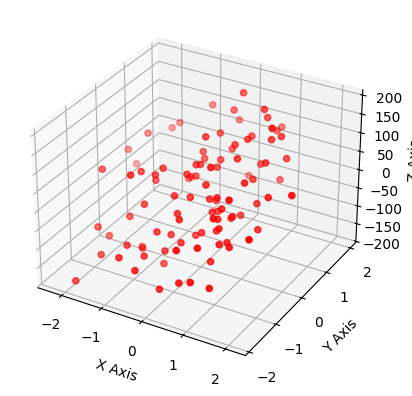

In [26]:
# fig = px.scatter_3d(df, x='feature1', y='feature2', z='target')

# fig.show()
# Creating a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['feature1'], df['feature2'], df['target'], c='r', marker='o')

ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')

plt.show()

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=3)

In [21]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [22]:
lr.fit(X_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [23]:
y_pred = lr.predict(X_test)

In [24]:
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("R2 score",r2_score(y_test,y_pred))

MAE 41.01421330997351
MSE 2175.469422074242
R2 score 0.662549700128799


## Multiple Linear Regression From Scratch

In [27]:
class MeraLR:
    
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None
        
    def fit(self,X_train,y_train):
        X_train = np.insert(X_train,0,1,axis=1)
        
        # calcuate the coeffs
        betas = np.linalg.inv(np.dot(X_train.T,X_train)).dot(X_train.T).dot(y_train)
        self.intercept_ = betas[0]
        self.coef_ = betas[1:]
    
    def predict(self,X_test):
        y_pred = np.dot(X_test,self.coef_) + self.intercept_
        return y_pred
        
    

In [28]:
lr = MeraLR()

In [29]:
lr.fit(X_train,y_train)

In [30]:
y_pred = lr.predict(X_test)

In [31]:
r2_score(y_test,y_pred)

0.662549700128799